# Team number:5D12
# Sem 5, D Division, SOCSE
# Title:Building insurance claim predition.(5DMACP08)
# Problem statement: To predict if a building will have an insurance claim during a certain period.
# Team:
# Suyog Bhat(TL).................Roll no-251  USN-01fe17bcs225
# Shreyas katagi...................Roll no-222  USN-01FE17BCS196
# Shrinivas Miskin................Roll No-223  USN-01FE17BCS197
# Shreevardhan Kamble......Roll No-224  USN-01FE17BCS198 
# Link: https://challengedata.ens.fr/challenges/19

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [99]:
#reading input file

train_users = pd.read_csv('./X_train.csv')
test_users=pd.read_csv('./X_test.csv')
users=pd.concat((train_users, test_users), axis = 0, ignore_index = True, sort = False)
aa=users

In [100]:
print("In total we have",users.shape[0], "users.")

In total we have 13641 users.


In [101]:
#NULL values

users_nan = (users.isnull().sum() / users.shape[0]) * 100
users_nan[users_nan > 0]

superficief     1.180265
ft_22_categ    12.007917
Insee           1.128949
dtype: float64

In [102]:
#convert EXPO int float replacing , by .

users['EXPO'] = [x.replace(',', '.') for x in users['EXPO']]
users['EXPO'] = users['EXPO'].astype(float)
#EXPO atribute converted into float values

# Handling NULL

In [103]:
#mean values for expo and superficief

users['EXPO'].fillna(users['EXPO'].mean(),inplace=True)
users['superficief'].fillna(users['superficief'].mean(),inplace=True)
users.EXPO.head()

0    1.000000
1    1.000000
2    1.000000
3    0.246575
4    1.000000
Name: EXPO, dtype: float64

In [104]:
#fixing null values of ft_22_categ and superficief

users['ft_22_categ'].fillna(users['ft_22_categ'].mode()[0],inplace=True)
users['Insee'].fillna(-1, inplace = True)
#most building constructed year seems right replacement for NaN
#insee data is replaced by global constant

# Outlier Handling

In [105]:
#less than 5 m^2 seems impossible EXPO 0 is impossible 

users.loc[users.EXPO==0,'EXPO']=0.020
users.loc[users.superficief<5,'superficief']=5
users.loc[users.superficief>10000,'superficief']=10000
#all value greater than 10000 are considered as 10000

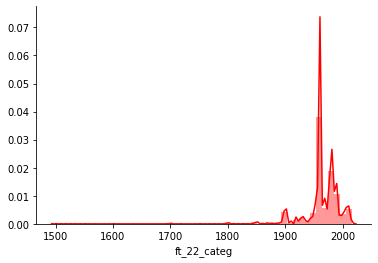

In [106]:
#year of construction

sns.distplot(users.ft_22_categ.dropna(), color='red')
plt.xlabel('ft_22_categ')
sns.despine()
#starts from 1500 which looks like monument but needs to be modified

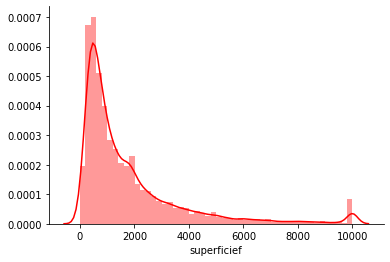

In [107]:
#area and count plot after outlier removal

sns.distplot(users.superficief.dropna(), color='red')
plt.xlabel('superficief')
sns.despine()
#extends upto 35000 which is hard to believe needs to be handled

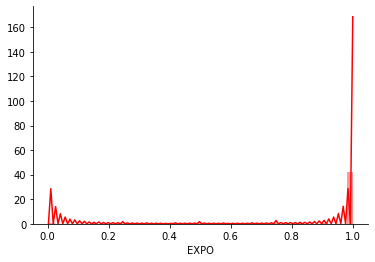

In [108]:
#period of insurance distribution after removal of outlier

sns.distplot(users.EXPO.dropna(), color='red')
plt.xlabel('EXPO')
sns.despine()
#starts with 0 which is impossible case needs to be handled

In [109]:
#combining target values

res= pd.read_csv('./y_train_saegPGl.csv')
users['target']=res['target']

# Data integration (external data)

External data from french government is used which was allowed in the challenge

In [110]:
#reading external data

ins=pd.read_csv('./extinsee.csv')
ins.shape[0]

36742

In [111]:
#merding insee codes

mer=pd.merge(users,ins,on='Insee',how='left')
mer.columns

Index(['n', 'Identifiant', 'ft_2_categ', 'EXPO', 'ft_4_categ', 'ft_5_categ',
       'ft_6_categ', 'ft_7_categ', 'ft_8_categ', 'ft_9_categ', 'ft_10_categ',
       'ft_11_categ', 'ft_12_categ', 'ft_13_categ', 'ft_14_categ',
       'ft_15_categ', 'ft_16_categ', 'ft_17_categ', 'ft_18_categ',
       'ft_19_categ', 'superficief', 'ft_21_categ', 'ft_22_categ',
       'ft_23_categ', 'ft_24_categ', 'Insee', 'target', 'Commune',
       'Department', 'Reion', 'Altitude Moyenne', 'Superficie'],
      dtype='object')

# Data Reduction(ext data)

In [112]:
#unnecessary columns in insee data

mer.drop('Commune',axis=1,inplace=True)
mer.drop('Reion',axis=1,inplace=True)
mer.drop('Altitude Moyenne',axis=1,inplace=True)
mer.drop('Superficie',axis=1,inplace=True)

In [113]:
#target variable is extracted

claimed=users.loc[users['target']==1]

# Data transformation

In [114]:
#Label encoding categorical values

from sklearn.preprocessing import LabelEncoder
labeled_users=mer
labeled_users=labeled_users[['ft_5_categ','ft_6_categ','ft_7_categ', 'ft_8_categ', 'ft_9_categ',
       'ft_10_categ', 'ft_11_categ', 'ft_12_categ', 'ft_13_categ',
       'ft_14_categ', 'ft_15_categ', 'ft_16_categ', 'ft_17_categ',
       'ft_18_categ','ft_23_categ','ft_24_categ','Department']].astype('str')
le=LabelEncoder()
la=labeled_users.apply(le.fit_transform)
mer=mer.drop(['ft_5_categ','ft_6_categ','ft_7_categ', 'ft_8_categ', 'ft_9_categ',
       'ft_10_categ', 'ft_11_categ', 'ft_12_categ', 'ft_13_categ',
       'ft_14_categ', 'ft_15_categ', 'ft_16_categ', 'ft_17_categ',
       'ft_18_categ','ft_23_categ','ft_24_categ','Department'],axis=1)
mer1=pd.concat((mer,la),axis=1)
mer1.head()

,n,Identifiant,ft_2_categ,EXPO,ft_4_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,Insee,...,ft_12_categ,ft_13_categ,ft_14_categ,ft_15_categ,ft_16_categ,ft_17_categ,ft_18_categ,ft_23_categ,ft_24_categ,Department
0,0,18702,2014,1.000000,0,2,1351.0,4,2012.0,65440,...,0,0,0,0,0,2,1,0,2,41
1,1,3877,2014,1.000000,0,2,1972.0,2,1980.0,14341,...,2,2,2,1,1,0,1,0,0,13
2,2,4942,2013,1.000000,1,2,1630.0,4,1960.0,75109,...,2,2,2,1,1,0,1,0,0,69
3,3,13428,2013,0.246575,0,2,532.0,3,1960.0,92004,...,2,2,2,1,1,0,1,0,0,42
4,4,17137,2015,1.000000,0,2,1050.0,2,1972.0,59340,...,0,1,0,0,0,2,1,0,4,66


This is the 2nd iteration, It gave better results than 1 st iteration of one hot encoding May be because of less unique values and less columns

# Dropping ID and Row number

In [115]:
#dropping ID and row number

train=mer1
train.drop('n',axis=1,inplace=True)
train.drop('Identifiant',axis=1, inplace=True)

In [116]:
#train test seperation

test=train[train['target'].isnull()]
test.drop('Insee',axis=1,inplace=True)
train=train[np.isfinite(train['target'])]

In [117]:
#label encoding of target variable and dropping prev target column

from sklearn.preprocessing import LabelEncoder
y=pd.read_csv('./y_train_saegPGl.csv')
y.drop('n',axis=1,inplace=True)
y.drop('Identifiant',axis=1,inplace=True)

x = train.drop('target', axis=1, inplace=False)
x = x.drop('Insee', axis=1, inplace=False)
test.drop('target',axis=1,inplace=True)

In [118]:
# Library import

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE ,ADASYN
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [119]:
# Normalized Gini Coef score function

def gini(actual, pred):
    assert (len(actual) == len(pred))
    all = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=np.float)
    all = all[np.lexsort((all[:, 2], -1 * all[:, 1]))]
    totalLosses = all[:, 0].sum()
    giniSum = all[:, 0].cumsum().sum() / totalLosses
    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)


def gini_normalized(actual, pred):
    print("NGC Score : ")
    return gini(actual, pred) / gini(actual, actual)

In [120]:
#assigning test df to test

train_x=x
train_y=y
test_x=test

# RFE from Dtree

In [121]:
#model construction (XG Boost)

model = DecisionTreeClassifier()
rfe=RFE(model,1)
rfe=rfe.fit(x,y)
print(rfe.support_)
print(rfe.ranking_)

[False False False False  True False False False False False False False
 False False False False False False False False False False False False]
[ 3  6  9 17  1  7  4 11 19 13 23 22 18 20 14  8 15 21 24 16 10 12  5  2]


In [122]:
#Dropping less impt features specified bt RFE

x=x.drop(['ft_8_categ', 'ft_9_categ', 'ft_10_categ','ft_11_categ','ft_16_categ'],axis=1)
test_x=test_x.drop(['ft_8_categ', 'ft_9_categ', 'ft_10_categ','ft_11_categ','ft_16_categ'],axis=1)

In [123]:
x.columns

Index(['ft_2_categ', 'EXPO', 'ft_4_categ', 'ft_19_categ', 'superficief',
       'ft_21_categ', 'ft_22_categ', 'ft_5_categ', 'ft_6_categ', 'ft_7_categ',
       'ft_12_categ', 'ft_13_categ', 'ft_14_categ', 'ft_15_categ',
       'ft_17_categ', 'ft_18_categ', 'ft_23_categ', 'ft_24_categ',
       'Department'],
      dtype='object')

# Model building

In [124]:
model=XGBClassifier(learning_rate=0.1,subsample=0.7,n_estimators=200)
model.fit(xx,yy)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=1)

In [125]:
rand=RandomForestClassifier(n_estimators=800,min_samples_leaf=10)
rand.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Validation

In [126]:
kf = KFold(n_splits=3, random_state=42, shuffle=False)
for train_set,test_set in kf.split(y):
    df=train
    #print(train_set, test_set)
    features_train=x[x.index.isin(train_set)]
    features_test=x[x.index.isin(test_set)]
    labels_train=y[y.index.isin(train_set)]
    labels_test=y[y.index.isin(test_set)]
    model1 = DecisionTreeClassifier()
    model1.fit(features_train, labels_train)
    log=LogisticRegression()
    log.fit(features_train, labels_train)
    nb=GaussianNB()
    nb.fit(features_train, labels_train)
    y_pred1 = model1.predict(features_test)
    y_pred2=log.predict(features_test)
    y_pred3=nb.predict(features_test)
    print("Dtree")
    accuracy = accuracy_score(labels_test,y_pred1)
    ngc= gini_normalized(labels_test, y_pred1)
    print(ngc)
    results = confusion_matrix(labels_test,y_pred1)
    print(results) 
    #print("Accuracy: %.2f%%" % (accuracy * 100.0))
    print("log_regrsn")
    accuracy = accuracy_score(labels_test,y_pred2)
    ngc= gini_normalized(labels_test, y_pred2)
    print(ngc)
    results = confusion_matrix(labels_test,y_pred2) 
    print(results) 
    #print("Accuracy: %.2f%%" % (accuracy * 100.0))
    print("NaiveBayes")
    ngc= gini_normalized(labels_test, y_pred3)
    print(ngc)
    results = confusion_matrix(labels_test,y_pred3)
    print(results) 
    print("-----------------------------------------")

Dtree
NGC Score : 
0.09219885269749405
[[2043  593]
 [ 511  263]]
log_regrsn
NGC Score : 
0.09895974246470057
[[2574   62]
 [ 662  112]]
NaiveBayes
NGC Score : 
0.2325473566165947
[[2178  458]
 [ 449  325]]
-----------------------------------------
Dtree
NGC Score : 
0.13019951525531595
[[2072  566]
 [ 518  254]]
log_regrsn
NGC Score : 
0.14788248280413405
[[2561   77]
 [ 657  115]]
NaiveBayes
NGC Score : 
0.23839008983882445
[[2254  384]
 [ 486  286]]
-----------------------------------------
Dtree
NGC Score : 
0.10815247395272529
[[2043  590]
 [ 518  258]]
log_regrsn
NGC Score : 
0.11766007180864609
[[2532  101]
 [ 651  125]]
NaiveBayes
NGC Score : 
0.20789660181440162
[[2145  488]
 [ 475  301]]
-----------------------------------------


In [127]:
kf = KFold(n_splits=3, random_state=42, shuffle=False)
for train_set,test_set in kf.split(y):
    df=train
    #print(train_set, test_set)
    features_train=x[x.index.isin(train_set)]
    features_test=x[x.index.isin(test_set)]
    labels_train=y[y.index.isin(train_set)]
    labels_test=y[y.index.isin(test_set)]
    model1 = XGBClassifier(subsample=0.7,learning_rate=.1,n_estimators=200)
    model1.fit(features_train, labels_train)
    rand.fit(features_train, labels_train)
    y_pred1 = model1.predict(features_test)
    y_pred2=rand.predict(features_test)
    print("XGB")
    ngc= gini_normalized(labels_test, y_pred1)
    print(ngc)
    results = confusion_matrix(labels_test,y_pred1) 
    print(results) 
    #print("Accuracy: %.2f%%" % (accuracy * 100.0))
    print("RF")
    ngc= gini_normalized(labels_test, y_pred2)
    print(ngc)
    results = confusion_matrix(labels_test,y_pred2) 
    print(results) 
    #print("Accuracy: %.2f%%" % (accuracy * 100.0))
    print("---------------------------------------")

XGB
NGC Score : 
0.14880133159238224
[[2541   95]
 [ 615  159]]
RF
NGC Score : 
0.09782165445256095
[[2574   62]
 [ 661  113]]
---------------------------------------
XGB
NGC Score : 
0.1725891415619463
[[2510  128]
 [ 624  148]]
RF
NGC Score : 
0.13695510415725523
[[2575   63]
 [ 674   98]]
---------------------------------------
XGB
NGC Score : 
0.15411255241757077
[[2492  141]
 [ 620  156]]
RF
NGC Score : 
0.10895317559445736
[[2535   98]
 [ 661  115]]
---------------------------------------


# Bias Variance TradeOff

In [128]:
# Learning Curve function

cv = ShuffleSplit(n_splits=3, test_size=0.3, random_state=0)
def plot_learning_curve(estimator, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10,6))
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Test Score")

    plt.legend(loc="best")
    return plt

# D Tree

<module 'matplotlib.pyplot' from '/home/suyog/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

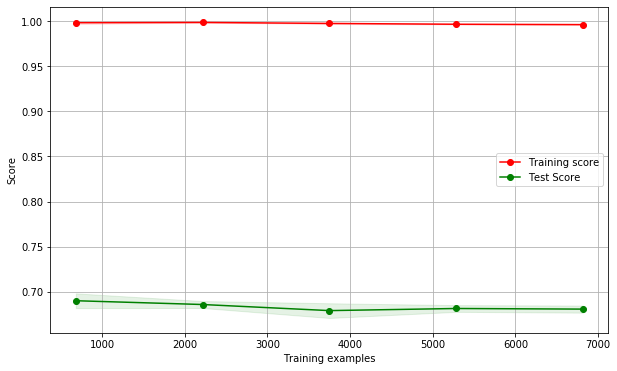

In [129]:
estimator = DecisionTreeClassifier()
plot_learning_curve(estimator,x, y, cv=None, n_jobs=4)

train and test scores are not converging at all both follow straight line which is definitely a case of overfitting

# Log Reg

<module 'matplotlib.pyplot' from '/home/suyog/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

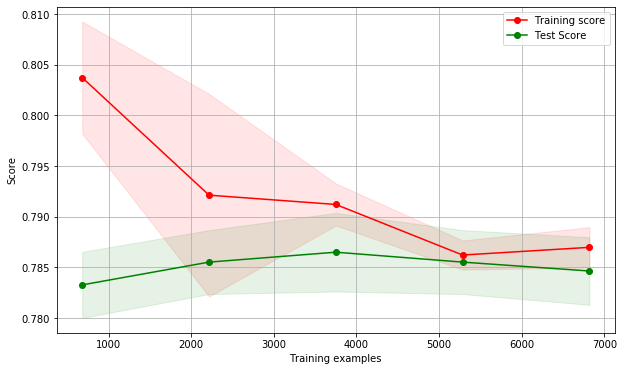

In [130]:
estimator =LogisticRegression()
plot_learning_curve(estimator,x, y, cv=None, n_jobs=4)

training score decreased abruptly test score is increasing slowly

# Gaussian NB

<module 'matplotlib.pyplot' from '/home/suyog/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

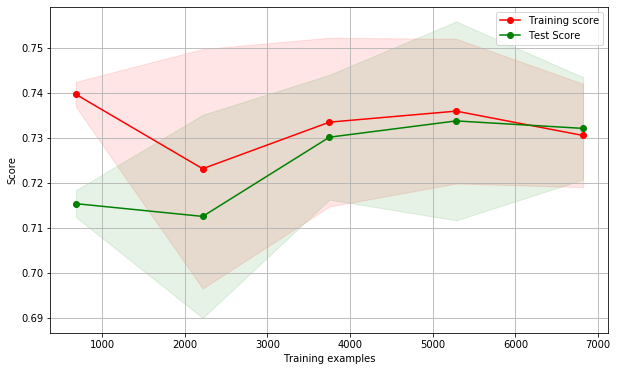

In [131]:
estimator =GaussianNB()
plot_learning_curve(estimator,x, y, cv=None, n_jobs=4)

# Bernoulli NB

<module 'matplotlib.pyplot' from '/home/suyog/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

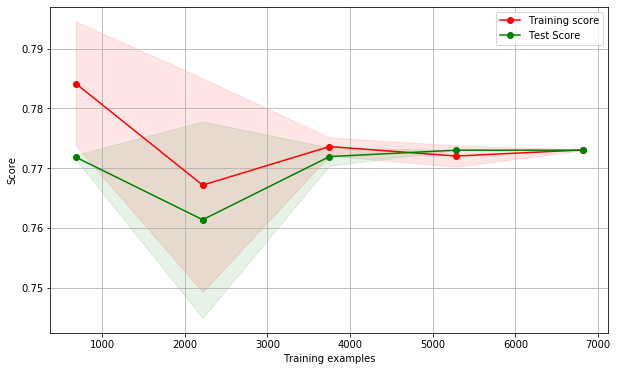

In [132]:
from sklearn.naive_bayes import BernoulliNB
estimator =BernoulliNB()
plot_learning_curve(estimator,x, y, cv=None, n_jobs=4)

# RF

<module 'matplotlib.pyplot' from '/home/suyog/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

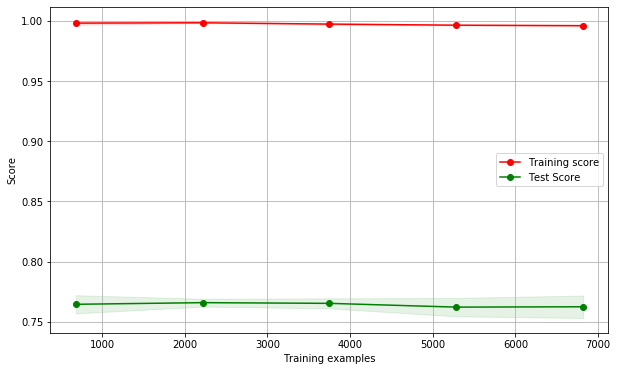

In [133]:
estimator = RandomForestClassifier(n_estimators=500)
plot_learning_curve(estimator,x, y, cv=None, n_jobs=4)

# XGB

<module 'matplotlib.pyplot' from '/home/suyog/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

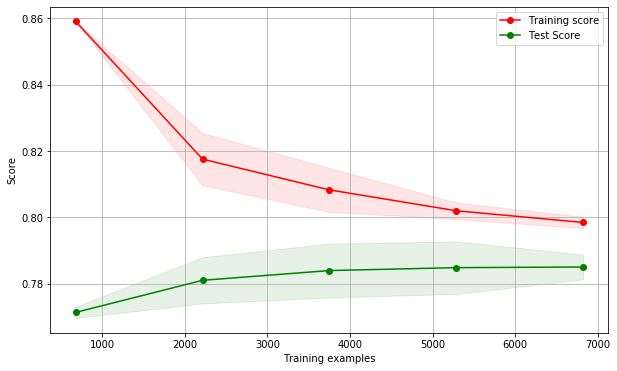

In [134]:
estimator = XGBClassifier()
plot_learning_curve(estimator,x, y, cv=None, n_jobs=4)

training score and testing score is following a pattern which is a good learning curve

# Smote to reduce class imbalance

In [135]:
from imblearn.over_sampling import SMOTE
X = np.array(x)
y = np.array(y)
from collections import Counter
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(x, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 7907, 1: 7907})


In [136]:
xx=pd.DataFrame(X_res,columns=['ft_2_categ', 'EXPO', 'ft_4_categ', 'ft_19_categ', 'superficief',
       'ft_21_categ', 'ft_22_categ', 'ft_5_categ', 'ft_6_categ', 'ft_7_categ',
       'ft_12_categ', 'ft_13_categ', 'ft_14_categ', 'ft_15_categ',
       'ft_17_categ', 'ft_18_categ', 'ft_23_categ', 'ft_24_categ',
       'Department'])
yy=pd.DataFrame(y_res,columns=['target'])

In [137]:
nb=GaussianNB(priors=None,var_smoothing=1e-09)
nb.fit(xx,yy)

GaussianNB(priors=None, var_smoothing=1e-09)

# Generating output file

In [139]:
#output file for submission
test=pd.read_csv('./X_test1.csv')
test['target']=nb
test.to_csv('y_test.csv')
print("output file generated..!")

output file generated..!
